# Objective: To classify the fake and real news accurately. 

### ====================================================================================

## Step 1 : Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Step 2 : Load the Dataset

In [2]:
real_news_data = pd.read_csv("True.csv", encoding = 'unicode_escape')

In [3]:
fake_news_data = pd.read_csv("Fake.csv", encoding='unicode_escape')

In [4]:
real_news_data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
fake_news_data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obamas Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
real_news_data.shape, fake_news_data.shape

((21416, 4), (23481, 4))

## Step 3 : Data Preprocessing

### Creating a target column named ‘label’ for which the datasets are categorised as true or fake.

In [7]:
real_news_data['label'] = 1
fake_news_data['label'] = 0

### Merging the real and fake news datasets into a single dataframe.

In [8]:
News_Data = pd.concat([real_news_data,fake_news_data])

In [9]:
News_Data.sample(10)

,title,text,subject,date,label
12730,Brazil president sees lower house pension refo...,SAO PAULO (Reuters) - Brazilian President Mich...,worldnews,"December 8, 2017",1
7122,NY Times Columnist David Brooks: Trump Will B...,To say that David Brooks is not impressed with...,News,"April 3, 2016",0
18416,NYC COP Congratulates Trump Supporter For Educ...,"Based Stickman, aka Kyle Chapman became famous...",left-news,"Jun 29, 2017",0
13945,Nigeria ex-vice president prepared to run for ...,ABUJA (Reuters) - Nigeria s former Vice Presid...,worldnews,"November 24, 2017",1
19074,THE LAW OF UNINTENDED CONSEQUENCES: How Strong...,The fast food industry has been warning those ...,left-news,"Feb 27, 2017",0
17011,OBAMA Defends Black Lives Matter But Does He R...,But he s pointing the finger at the wrong aspe...,Government News,"Oct 23, 2015",0
15129,(Video) Trump Gives BEST ASSESSMENT EVER Of Ob...,Presidential Candidate Donald Trump gets to th...,politics,"Oct 3, 2015",0
2353,"Ivanka Trumps Dress Was Nice, But There Was ...",A consistent theme among Donald Trump s rhetor...,News,"March 1, 2017",0
13528,Bosnian Croat war crimes convict dies after ta...,THE HAGUE (Reuters) - A former Bosnian Croat m...,worldnews,"November 29, 2017",1
18996,EU's Juncker hails Macron speech as 'very Euro...,BRUSSELS (Reuters) - European Commission Presi...,worldnews,"September 26, 2017",1


#### Here, real news has the value of label as 1 and fake news have the value of label as 0.

In [10]:
News_Data.shape

(44897, 5)

In [11]:
#Checking for Null values
News_Data.isna().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

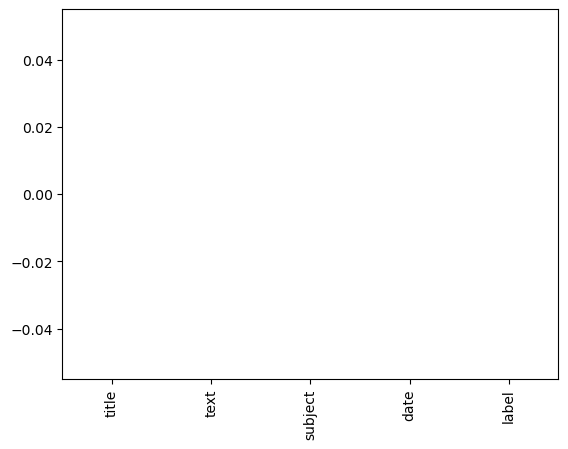

In [12]:
News_Data.isna().sum().plot.bar()
plt.show()

#### We can see from the above plot that there are no any null values present in our dataset.

In [13]:
#Checking for Duplicates
News_Data.duplicated().sum()

210

In [14]:
News_Data = News_Data.drop_duplicates()

In [15]:
#Dropping Duplicates
News_Data.duplicated().sum()

0

In [16]:
#CHECK INFINITE VALUES
News_Data.iloc[News_Data.values==np.inf].sum()

title      0.0
text       0.0
subject    0.0
date       0.0
label      0.0
dtype: float64

## Step 4: Data Understanding

In [17]:
News_Data

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied Safe Zone Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [18]:
News_Data.shape  #After dropping duplicates

(44687, 5)

In [19]:
News_Data.count()

title      44687
text       44687
subject    44687
date       44687
label      44687
dtype: int64

In [20]:
News_Data.dtypes

title      object
text       object
subject    object
date       object
label       int64
dtype: object

In [21]:
News_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44687 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44687 non-null  object
 1   text     44687 non-null  object
 2   subject  44687 non-null  object
 3   date     44687 non-null  object
 4   label    44687 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.0+ MB


In [22]:
News_Data.subject.value_counts()

politicsNews       11218
worldnews           9991
News                9050
politics            6838
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

## Step 5 : Data Visualization || EDA

###  Checking whether our data is balanced or not.

<AxesSubplot:xlabel='label', ylabel='count'>

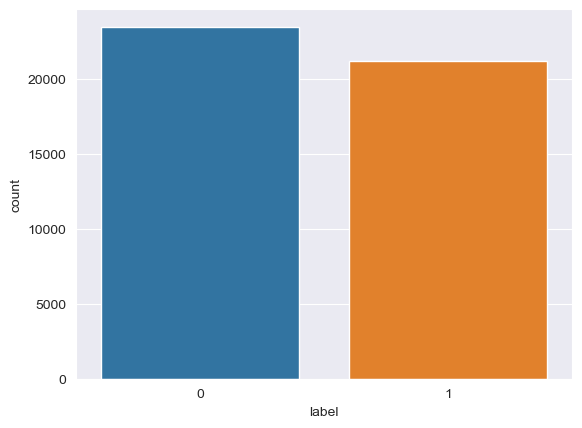

In [23]:
sns.set_style("darkgrid")
sns.countplot(News_Data.label)

#### Reason for Plotting: To check whether our datasets are balanced or not.

#### Major Insights: We can see that the dataset is balanced. So there is no chance of result being skewed towards the majority.

### Distribution plot of article lengths.

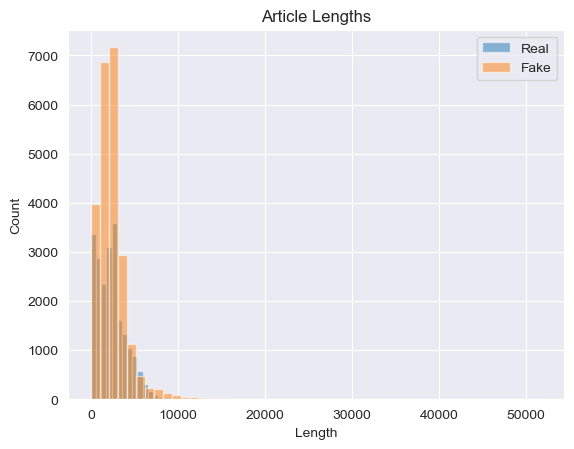

In [24]:
real_lengths = real_news_data['text'].apply(len)
fake_lengths = fake_news_data['text'].apply(len)

plt.hist(real_lengths, bins=50, alpha=0.5, label='Real')
plt.hist(fake_lengths, bins=50, alpha=0.5, label='Fake')
plt.title('Article Lengths')
plt.xlabel('Length')
plt.ylabel('Count')
plt.legend()
plt.show()

#### Reason for Plotting: Visualizing text length distribution helps identify potential differences between real and fake news articles, aiding in feature understanding.

#### Major Insights: As we can see, the length of the articles is highly variable, with some articles being very short and others being quite long.We will need to take this into account when preprocessing the text.

### Countplot for Subject

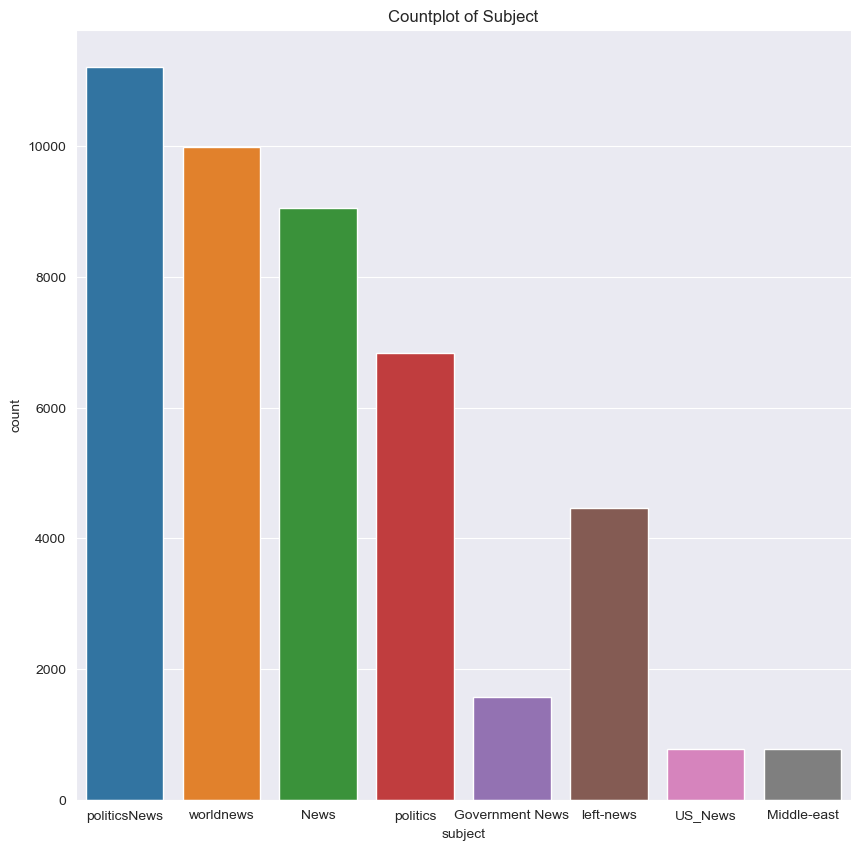

In [25]:
News_Data['subject'].value_counts()
plt.figure(figsize = (10,10))
sns.set_style("darkgrid")
sns.countplot(News_Data['subject'])
plt.title("Countplot of Subject")
plt.show()

##### There are news about 8 subjects. We have the largest number of news from politics News.

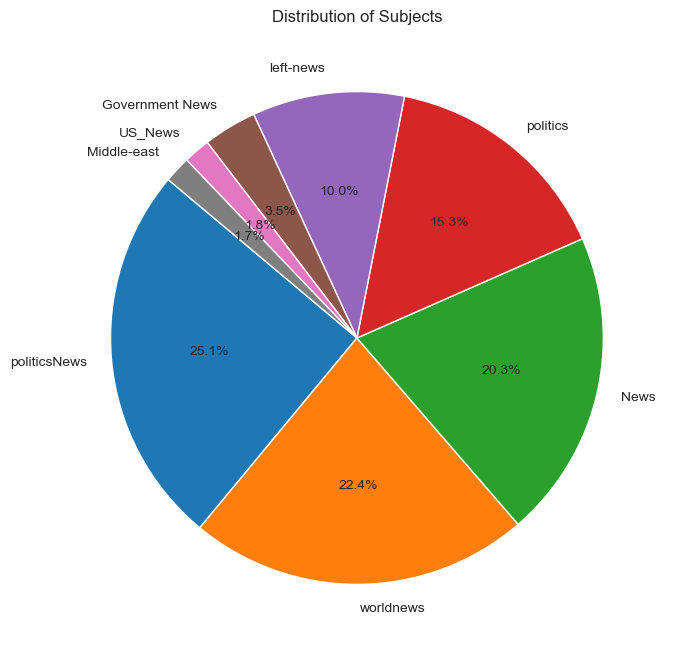

In [26]:
# Get the % distribution of each unique subject

subject_counts = News_Data['subject'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(subject_counts, labels=subject_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Subjects")
plt.show()

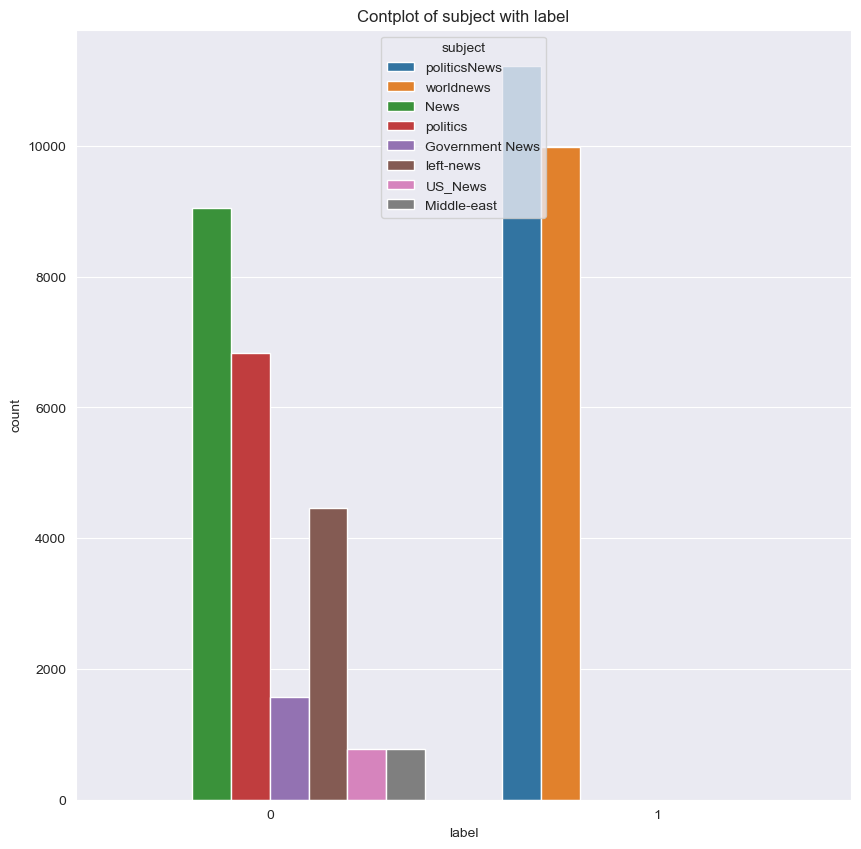

In [27]:
plt.figure(figsize = (10,10))
plt.title('Contplot of subject with label')
sns.set_style("dark")
chart = sns.countplot(x = "label", hue = "subject" , data = News_Data)
chart.set_xticklabels(chart.get_xticklabels(),rotation=0)
plt.show()

##### It is clear from the plot that all our real news belongs to 2 subjects: Political news and World news.

## =========================================================================

### Concatenating title and text fields into one column and drop all other columns.

It is clear that if we include the 'subject' column in our further exploration and analysis, it will have a significant impact on our results. So we will need to drop that column.

We will create the Corpus that will be used in our NLP model.For that we will create a single column with all the relevant texts and drop rest of the columns.

In [28]:
News_Data['text'] = News_Data['title'] + " " + News_Data['text']
News_Data = News_Data.drop(['title', 'subject', 'date'], axis=1)

In [29]:
News_Data.sample(10)

,text,label
4811,Highlights: The Trump presidency on March 21 a...,1
18721,Russia accuses CNN International of violating ...,1
3466,U.S. coal stocks fall; exit from climate deal ...,1
10661,Obama to meet Senate leaders over Supreme Cour...,1
4473,Giuliani Already Trying To Float Excuses For ...,0
3353,McCain RIPS GOP Brass Over Russian Hack Respo...,0
15157,"Euro budget, ESM, banking union stances unreso...",1
16515,BRILLIANT DANIEL HANNAN Smacks Down Rude CNN R...,0
2486,Trump Just Accused The Media Of Committing TR...,0
17228,German court sentences 88-year-old Holocaust d...,1


In [30]:
News_Data.shape

(44687, 2)

### Creating a word cloud to analyse the most frequent words in our data

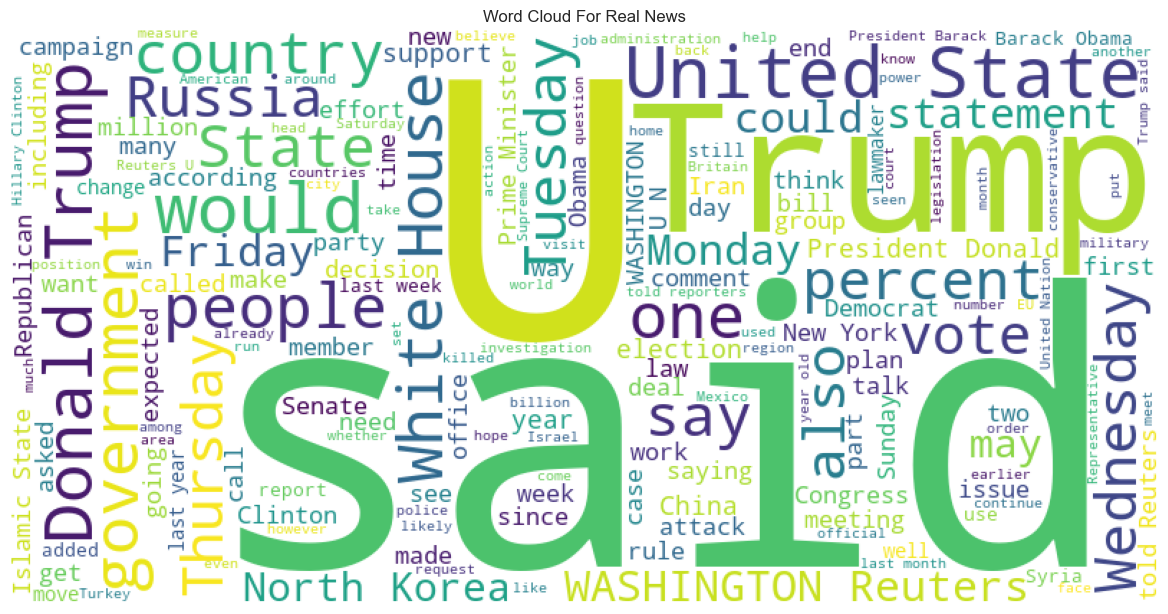

In [32]:
from wordcloud import WordCloud
from nltk.corpus import stopwords

#generate the word cloud for real news data

wordcloud_real = WordCloud(width = 800, height = 400, 
                background_color ='white',stopwords = stopwords.words('english'), min_font_size = 10).generate(" ".join(News_Data[News_Data['label'] == 1].text)) 
  
# plot the WordCloud image for real news data 

plt.figure(figsize = (12,6), facecolor = None) 
plt.imshow(wordcloud_real) 
plt.tight_layout(pad = 0) 
plt.title("Word Cloud For Real News")
plt.axis("off") 
plt.show() 

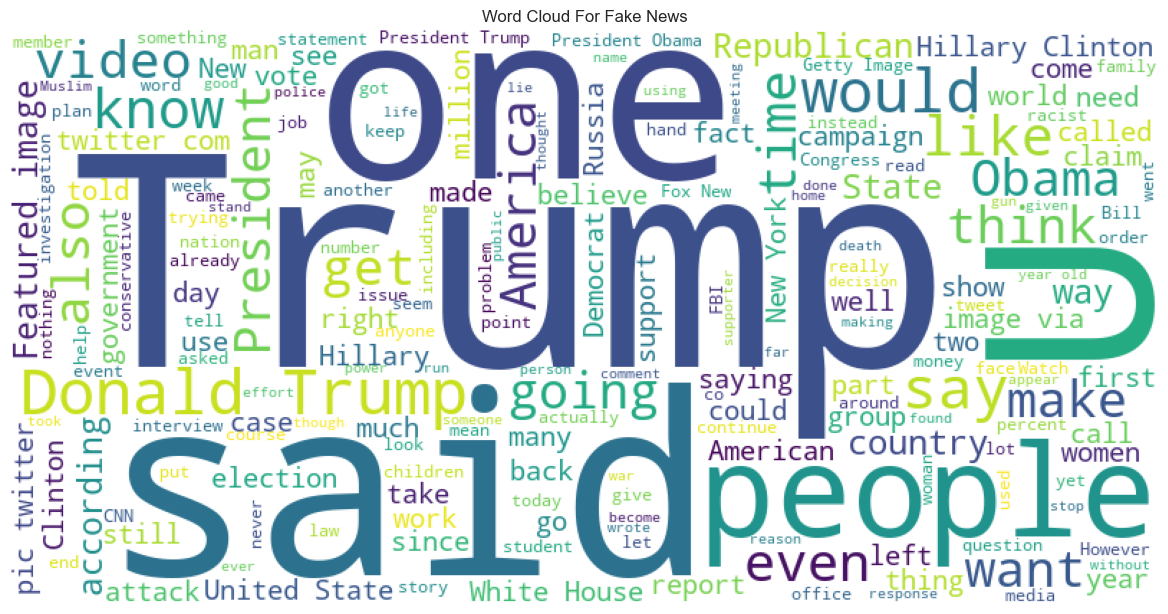

In [33]:
#generate the word cloud for fake news data

wordcloud_fake = WordCloud(width = 800, height = 400, 
                background_color ='white',stopwords = stopwords.words('english'), min_font_size = 10).generate(" ".join(News_Data[News_Data['label'] == 0].text)) 
  
# plot the word cloud for fake news data   

plt.figure(figsize = (12,6), facecolor = None) 
plt.imshow(wordcloud_fake) 
plt.tight_layout(pad = 0)
plt.title("Word Cloud For Fake News")
plt.axis("off")
plt.show() 

### We can conclude from the above two word clouds that there are lot of real and fake news about Donald Trump and United States.

### ====================================================================================

# 1: Text Analysis

## TF-IDF Vectorizer

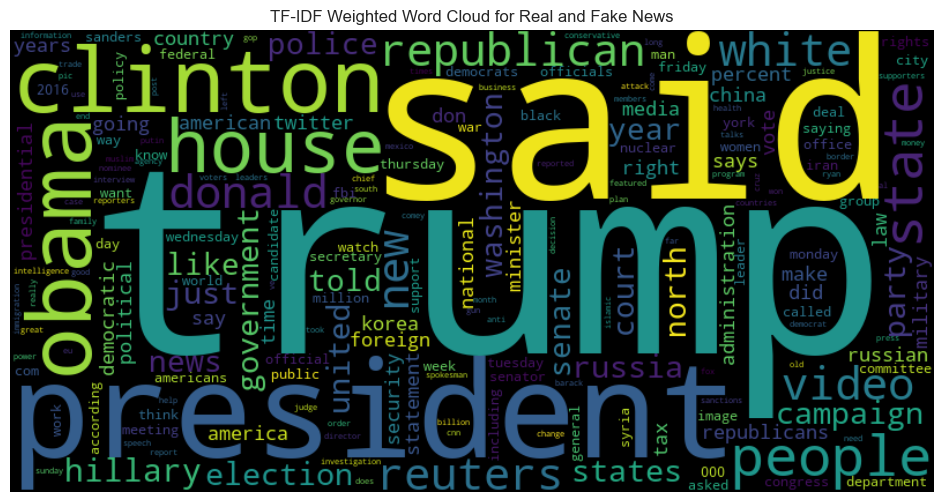

In [34]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', analyzer='word')
tfidf_matrix = tfidf_vectorizer.fit_transform(News_Data['text'])

# Get feature names (words)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Create a dictionary mapping words to their TF-IDF scores
word_tfidf_scores = dict(zip(feature_names, tfidf_matrix.sum(axis=0).A1))

# Generate a WordCloud using TF-IDF scores
wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(word_tfidf_scores)

# Display the WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("TF-IDF Weighted Word Cloud for Real and Fake News")
plt.axis('off')
plt.show()

#### Reason for Plotting: Visualizing TF-IDF weighted word cloud helps identify key terms distinguishing real and fake news, aiding feature understanding.

#### Major Insights: It reveals the prominence of specific terms, offering insights into the distinctive vocabulary associated with real and fake news.

#### Model Use: Terms importance captured through TF-IDF can be utilized as features in classification models to enhance the detection of real and fake news.

# 2: Sentiment Analysis

In [35]:
from textblob import TextBlob

# Create a function to perform sentiment analysis

def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply the sentiment analysis function to the 'text' column
News_Data['sentiment'] = News_Data['text'].apply(get_sentiment)

# Display the sentiment scores
print(News_Data[['text', 'sentiment']])

                                                    text  sentiment
0      As U.S. budget fight looms, Republicans flip t...   0.037083
1      U.S. military to accept transgender recruits o...   0.051296
2      Senior U.S. Republican senator: 'Let Mr. Muell...   0.115930
3      FBI Russia probe helped by Australian diplomat...   0.034969
4      Trump wants Postal Service to charge 'much mor...   0.042165
...                                                  ...        ...
23476  McPain: John McCain Furious That Iran Treated ...   0.067264
23477  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   0.097059
23478  Sunnistan: US and Allied Safe Zone Plan to T...   0.072183
23479  How to Blow $700 Million: Al Jazeera America F...   0.086240
23480  10 U.S. Navy Sailors Held by Iranian Military ...   0.033579

[44687 rows x 2 columns]


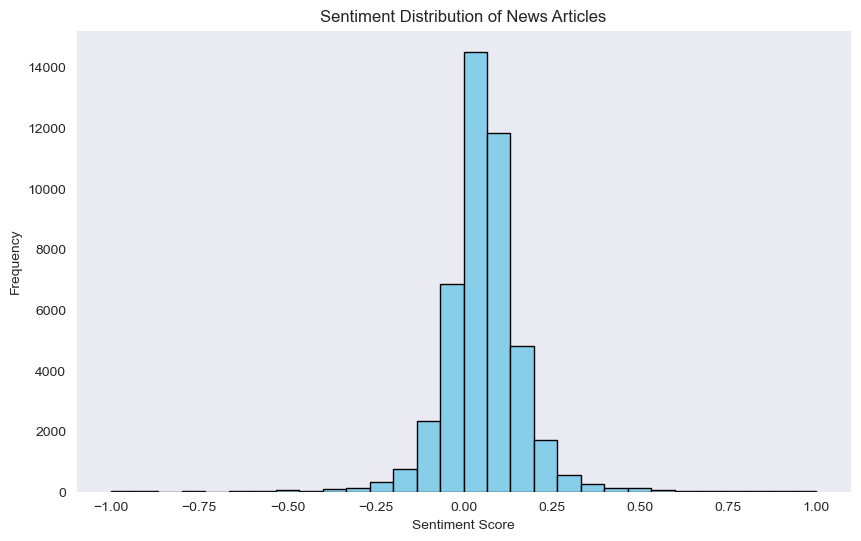

In [36]:
import matplotlib.pyplot as plt

# Plot the sentiment distribution
plt.figure(figsize=(10, 6))
plt.hist(News_Data['sentiment'], bins=30, color='skyblue', edgecolor='black')
plt.title('Sentiment Distribution of News Articles')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

#### Reason for Plotting: Visualizing sentiment distribution provides insights into the overall sentiment of news articles, aiding in understanding the emotional tone.

#### Major Insights: The histogram illustrates the prevailing sentiment in the dataset, showcasing whether the articles are generally positive, negative, or neutral.

#### Model Use: Sentiment scores can be used as features for models, potentially influencing the classification of real and fake news based on emotional cues

## 3: N-gram Analysis

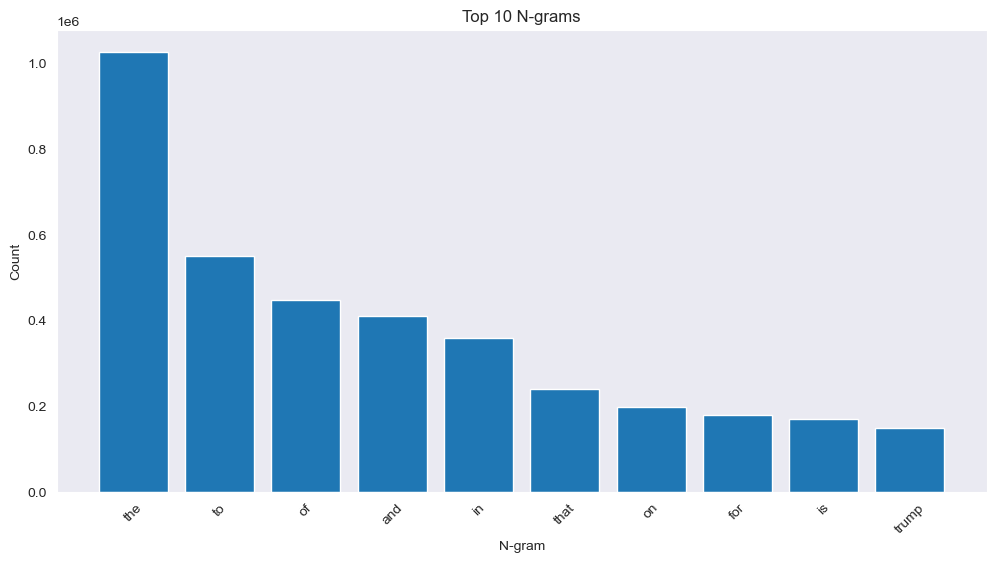

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer with N-gram range
vectorizer = CountVectorizer(ngram_range=(1, 3))

# Fit and transform the text data
X = vectorizer.fit_transform(News_Data['text'])

# Sum the counts of each N-gram
ngram_counts = X.sum(axis=0).A1

# Create a dictionary mapping N-grams to their counts
ngram_dict = dict(zip(vectorizer.get_feature_names_out(), ngram_counts))

# Get the top N most common N-grams
top_n = 10
top_ngrams = sorted(ngram_dict.items(), key=lambda x: x[1], reverse=True)[:top_n]

# Separate N-grams and their counts
top_ngram_names, top_ngram_counts = zip(*top_ngrams)

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(top_ngram_names, top_ngram_counts)
plt.title(f"Top {top_n} N-grams")
plt.xlabel("N-gram")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


#### 1. Reason for Plotting: Visualizing N-gram distribution helps uncover patterns and frequent word combinations within the text data.

#### 2. Major Insights: It allows you to identify the most common word sequences (unigrams, bigrams, trigrams) present in the news articles, providing insights into language patterns and potentially distinguishing features.

#### 3. Model Use: N-gram frequencies can be used as features in natural language processing (NLP) models. The variations in N-gram patterns may contribute to the classification of news articles, aiding in model building for tasks like fake news detection